In [1]:
import numpy as np
import skimage.io as io
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
import json
from pycocotools.coco import COCO
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, os.path.abspath('..'))
# from /home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/src/resize_functions.py import *
from resize_functions import *
from greg_cnn_cSigmoid import GregNet

In [3]:
bbox_file_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/bbox_crop_shape_gte10k.json'
pred_poly_file_path = '/media/greghovhannisyan/BackupData1/mscoco/annotations/by_vertex/temp.json'
poly_file_path_2 = '/media/greghovhannisyan/BackupData1/mscoco/annotations/by_vertex/temp2.json'
poly_file_path = '/media/greghovhannisyan/BackupData1/mscoco/annotations/by_vertex/temp2(copy).json'
#poly_file_path = '/media/greghovhannisyan/BackupData1/mscoco/annotations/crop_annotations/train2017_crop_bbox_polygons_resized.json'
image_dir_read_path_2 = '/media/greghovhannisyan/BackupData1/mscoco/images/by_vertex/temp_2/'
image_dir_read_path = '/media/greghovhannisyan/BackupData1/mscoco/images/by_vertex/30/'
#image_dir_read_path = '/media/greghovhannisyan/BackupData1/mscoco/images/train2017_crop_bbox_resized/'
annFile = '/media/greghovhannisyan/BackupData1/mscoco/annotations/instances/instances_train2017.json'

In [4]:
# initialize COCO api for instance annotations
coco=COCO()

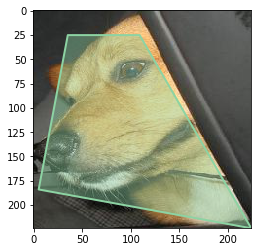

In [5]:
#8786
show_image_mask_by_id(coco, '8786', image_dir_read_path, poly_file_path)
#show_image_mask_by_id(coco, '3337', image_dir_read_path, poly_file_path)

In [8]:
#model_state_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/models/GregNet_MSELoss()_tensor(2504.4006)_RL_cS'
model_state_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/models/GregNet_MSELoss()_tensor(1.6813)'
model_state_path_l1 = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/models/GregNet_MSELoss()_tensor(1.7533)'
#model_state_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/models/GregNet_MSELoss()_tensor(3488.9854)'
model_instance = GregNet(15)

model_instance.eval()

GregNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

[[121.72809600830078, 94.17037200927734, 90.86761474609375, 62.91246032714844, 94.60090637207031, 50.12193298339844, 70.38509368896484, 24.137479782104492, 64.94996643066406, 31.19533348083496, 49.04331970214844, 24.64246368408203, 54.38180923461914, 45.87677764892578, 83.78910064697266, 117.33785247802734, 111.75176239013672, 163.71401977539062, 130.84597778320312, 203.44229125976562, 92.86750030517578, 195.40087890625, 80.1763916015625, 140.3780975341797, 49.179656982421875, 130.88070678710938, 72.6746597290039, 121.31417846679688, 120.86198425292969, 103.60610961914062]]


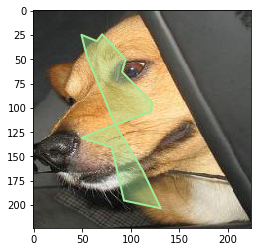

In [10]:
show_predicted_segmentation_polygon(8786, image_dir_read_path, model_state_path_l1, model_instance, coco)
#show_predicted_segmentation_polygon(3337, image_dir_read_path, model_state_path_l1, model_instance, coco)

In [13]:
with open(poly_file_path, 'r') as read_file:
    poly_json = json.load(read_file)